# Accumulated Local Effect Plots (ALEs)

Accumulated Local Effect Plots (ALEs) are a type of interpretability tool used in machine learning to understand the effect of individual features on the prediction of a model. Unlike Partial Dependence Plots (PDPs), which can be biased by correlated features, ALEs provide a more accurate representation by considering local changes and averaging them over the feature distribution. ALEs work by dividing the range of a feature into intervals, calculating the change in the model's prediction within each interval, and then accumulating these changes. This method provides a visualization of how the model's predictions change in response to variations in a particular feature, helping to identify the feature's overall influence and interaction with the model.

In [1]:
# Install necessary libraries
!pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 12.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 73.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 21.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from alibi.explainers import ALE
from alibi.explainers import plot_ale

df=pd.read_csv("https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/Boston.csv", )
df = df.drop('Unnamed: 0', axis=1)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
X, y = df.drop('medv', axis=1), df['medv']
model = RandomForestRegressor()
model.fit(X, y)
model.score(X, y)

0.9846751838931748

In [4]:
# we are using Alibi to get explanation
ALE = ALE(model.predict , feature_names=X.columns, target_names=['medv'])
explain = ALE.explain(X.to_numpy())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does

# Interpretation

For the first plot crim (Crime Rate)

* Interpretation: The ALE plot for "crim" shows a steep decline in the ALE values as the crime rate increases, particularly at lower crime rates. This indicates that higher crime rates are associated with lower median home values. The sharp drop suggests a strong negative relationship between crime rate and home value at low crime rates.
* Pattern: The effect becomes less pronounced as the crime rate continues to increase, suggesting that very high crime rates do not further decrease the home values as drastically.

for the second plot zn (Proportion of Residential Land Zoned): 
* The ALE plot for "zn" shows very little variation, suggesting that the proportion of residential land zoned for large lots has a minimal effect on the median home values. The line is almost flat, indicating that changes in "zn" do not significantly influence the target variable.
* Pattern: The minor fluctuations around the zero line suggest a very weak relationship, if any, between "zn" and home values.

As we can see these plots are explaining the impact of the features on the target variable

array([[<Axes: xlabel='crim', ylabel='ALE'>,
        <Axes: xlabel='zn', ylabel='ALE'>,
        <Axes: xlabel='indus', ylabel='ALE'>]], dtype=object)

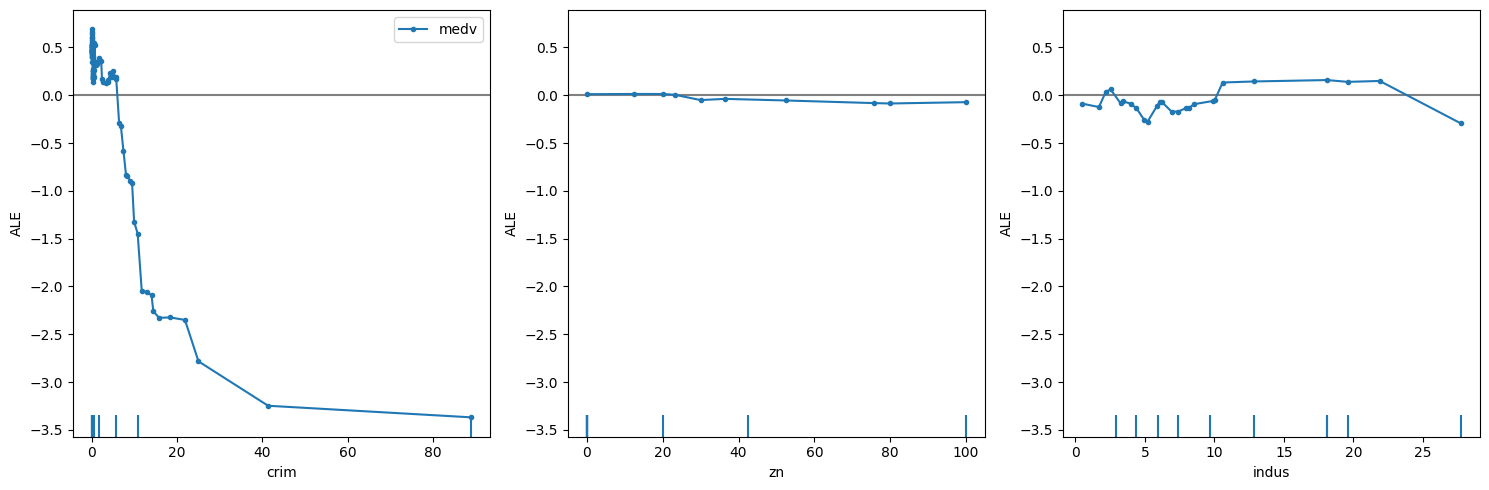

In [6]:
plot_ale(explain, features=[0,1,2], fig_kw={'figwidth':15, 'figheight': 5})

We can also combine different plot to better understand the impact

Text(0.5, 0, 'value')

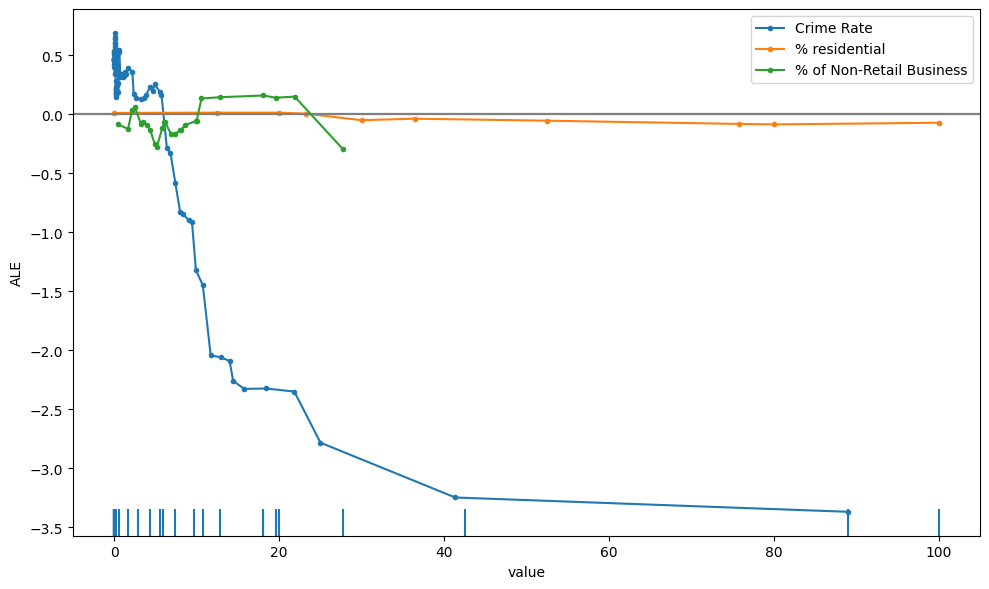

In [11]:
# Overall interaction plot

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

plot_ale(explain, features=[0], ax=ax, line_kw={'label': 'Crime Rate'})
plot_ale(explain, features=[1], ax=ax, line_kw={'label': '% residential'})
plot_ale(explain, features=[2], ax=ax, line_kw={'label': '% of Non-Retail Business'})

ax.set_xlabel('value')